<a href="https://colab.research.google.com/github/xeniia-nikole/Python_detecting_objects/blob/master/searching_in_image_by_yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [142]:
! pip install opencv-python
import cv2
import os
import numpy as np
from IPython.display import Image 

net = cv2.dnn.readNet('/content/yolov3.weights',
                '/content/yolov3.cfg')

with open('/content/coco.names') as f:
  labels = f.read().strip().split('\n')
#print(labels)

image = cv2.imread('/content/couple_of_birds2.jpg')
Image('/content/couple_of_birds2.jpg')

# image = cv2.imread('/content/couple2.jpg')
# Image('/content/couple2.jpg')

height, width, depth = image.shape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [143]:
blob = cv2.dnn.blobFromImage(image, 1/255, (416, 416), (0, 0, 0), swapRB = True)
net.setInput(blob)

layers_names = net.getLayerNames()
unconnected_layers = net.getUnconnectedOutLayersNames()
print(unconnected_layers)

output_layers = net.forward(unconnected_layers)
print(output_layers)

('yolo_82', 'yolo_94', 'yolo_106')
(array([[0.03816384, 0.0503011 , 0.37845647, ..., 0.        , 0.        ,
        0.        ],
       [0.04717547, 0.03491368, 0.27321684, ..., 0.        , 0.        ,
        0.        ],
       [0.04969523, 0.03982111, 0.7907046 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.95961356, 0.94910824, 0.4155557 , ..., 0.        , 0.        ,
        0.        ],
       [0.9629504 , 0.9649795 , 0.29708144, ..., 0.        , 0.        ,
        0.        ],
       [0.97153145, 0.96177995, 0.8235836 , ..., 0.        , 0.        ,
        0.        ]], dtype=float32), array([[0.01959054, 0.02496911, 0.05296544, ..., 0.        , 0.        ,
        0.        ],
       [0.01749506, 0.01835493, 0.32908434, ..., 0.        , 0.        ,
        0.        ],
       [0.02380301, 0.01623905, 0.07703386, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.9770308 , 0.9769916 , 0.04521032, ..., 0.        , 0.        ,
    

In [144]:
def draw_objects(x, y, w, h, image):
  x1, y1 = x - w // 2, y - h // 2
  x2, y2 = x + w // 2, y + h // 2
  color = [238, 151, 255]
  width = 2
  font_size = 1
  font = cv2.FONT_HERSHEY_SIMPLEX
  text = 'bird'

  image = cv2.rectangle(image, (x1, y1), (x2, y2), color, width)
  image = cv2.putText(image, text, (x1, y1 - 10), font, font_size, color, width)

  return image 

In [145]:
boxes = []
probabilities = []

for layer in output_layers: 
  for result in layer:
    x, y, w, h = result[:4]
    x = int(x * width)
    y = int(y * height)
    w = int(w * width)
    h = int(h * height) 
    # print(layer)
    # print(result)
    
    probability = result[5:]
    index_max_probability = np.argmax(probability)
    max_probability = probability[index_max_probability]

    if max_probability > 0:
      image_with_objects = draw_objects(x, y, w, h, image)

      boxes.append([x, y, w, h])
      probabilities.append(max_probability)

In [146]:
filtered_boxes = cv2.dnn.NMSBoxes(boxes, probabilities, 0.0, 0.7)
for boxes in filtered_boxes:
  image_with_objects = draw_objects(x, y, w, h, image)

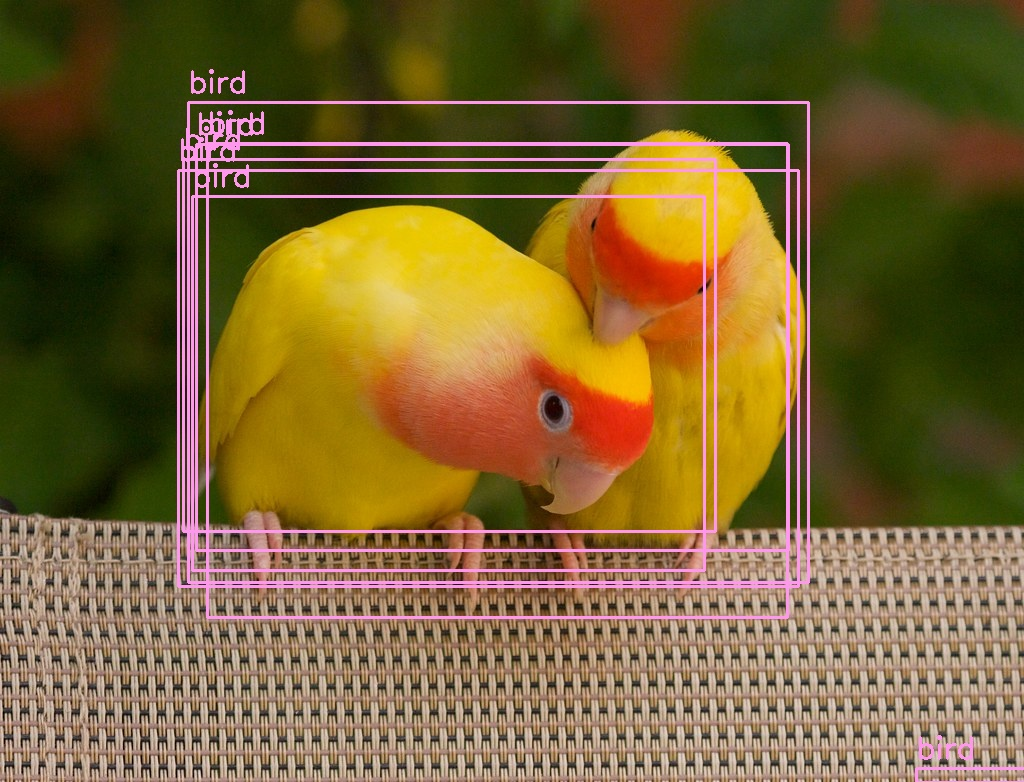

In [147]:
cv2.imwrite('/content/image_with_objects.jpg', image_with_objects)
Image('/content/image_with_objects.jpg')

In [148]:
os.remove('image_with_objects.jpg')
del(image_with_objects)